In [ ]:
%matplotlib inline
from matplotlib.pyplot import *
from processing.HailEvaluation import *
import numpy as np
import pandas as pd
from data.SSEFModelGrid import SSEFModelGrid
from mpl_toolkits.basemap import Basemap
from processing.EnhancedWatershedSegmenter import EnhancedWatershed
from processing.StormProcessing import *
from skimage.morphology import watershed,disk
from netCDF4 import Dataset
from processing.HailCaseStudy import HailMemberCaseStudy
from data.HailData import HailData
from datetime import datetime,timedelta
from matplotlib.colors import ListedColormap
from data.MESHGrid import *
import scipy.ndimage as ndi
from data.HailGrid import HailGrid

In [2]:
startDate = datetime(2013,5,20,18,0)
endDate = datetime(2013,5,21,0,0)
mesh4km = MESHInterpolatedGrid(startDate,endDate)



In [36]:
hd = HailData(startDate,endDate)
hd.loadData("../mping.csv","mping")
hd.loadWebData(startDate,endDate)
hd = hd.filterReportsByDate(startDate,endDate)
hg = HailGrid(4000,varGrid.basemap)
hg.neighborhoodMax(hd,25000)

2013-05-20 06:00:00


<matplotlib.contour.QuadContourSet instance at 0x2b8bf31e5638>

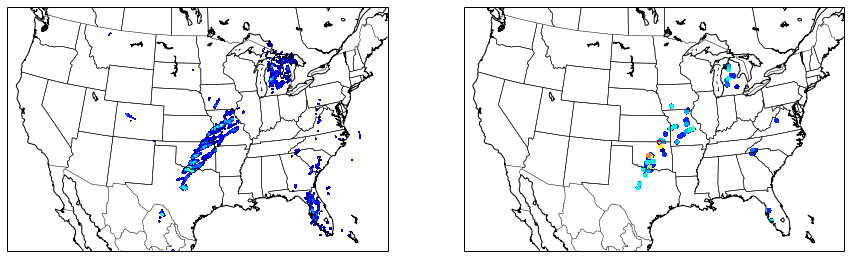

In [38]:
figure(figsize=(15,5))
meshFiltered = ndi.maximum_filter(mesh4km.MESH.max(axis=0),None,disk(2))
subplot(1,2,1)
varGrid.basemap.drawstates()
varGrid.basemap.drawcoastlines()
varGrid.basemap.drawcountries()
x1,y1 = varGrid.basemap(mesh4km.lon,mesh4km.lat)
x2,y2 = varGrid.basemap(hg.lon,hg.lat)
contourf(x1,y1,meshFiltered / 25.4,np.arange(0.25,4.25,0.25))
subplot(1,2,2)
varGrid.basemap.drawstates()
varGrid.basemap.drawcoastlines()
varGrid.basemap.drawcountries()
contourf(x2,y2,hg.data,np.arange(0.25,4.25,0.25))

In [42]:
rfPath = '/sharp/djgagne/rf_storm_results/'
srrfPath = '/sharp/djgagne/srrf_storm_results/'
hcv = HailCrossValidation(rfPath,srrfPath)

wrf-s4cn_arw
wrf-s4m3_arw
wrf-s4m4_arw
wrf-s4m5_arw
wrf-s4m6_arw
wrf-s4m7_arw
wrf-s4m8_arw
wrf-s4m9_arw
wrf-s4m10_arw
wrf-s4m11_arw
wrf-s4m12_arw
wrf-s4m13_arw
wrf-s4m14_arw
wrf-s4m15_arw


wrf-s4cn_arw
wrf-s4m3_arw
wrf-s4m4_arw
wrf-s4m5_arw
wrf-s4m6_arw
wrf-s4m7_arw
wrf-s4m8_arw
wrf-s4m9_arw
wrf-s4m10_arw
wrf-s4m11_arw
wrf-s4m12_arw
wrf-s4m13_arw
wrf-s4m14_arw
wrf-s4m15_arw


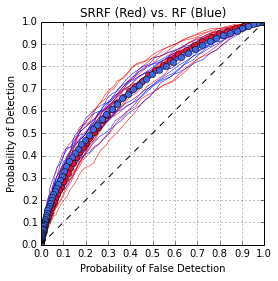

In [4]:
srrfROC,rfROC = hcv.superROCCurve()
figure(figsize=(4,4))
for m,member in enumerate(hcv.ensembleMembers):
    plot(srrfROC[1,m],srrfROC[0,m],'r',linewidth=0.5)
    plot(rfROC[1,m],rfROC[0,m],'b',linewidth=0.5)
plot(srrfROC[1].mean(axis=0),srrfROC[0].mean(axis=0),marker='o',color='crimson',linewidth=3)
plot(rfROC[1].mean(axis=0),rfROC[0].mean(axis=0),marker='o',color='royalblue',linewidth=3)

null = np.arange(0,1.1,0.1)
xticks(null)
yticks(null)
grid()
plot(null,null,'k--')
xlabel("Probability of False Detection")
ylabel("Probability of Detection")
title("SRRF (Red) vs. RF (Blue)")
savefig("roc_curve.pdf")
savefig("roc_curve.png")

0.024230067971341706

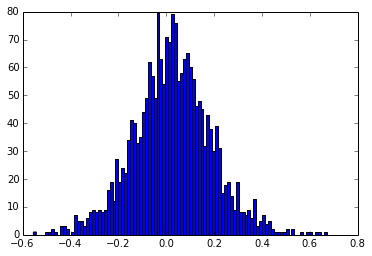

In [28]:
diff = hcv.rfPredictions['wrf-s4cn_arw']['severe'] - hcv.srrfPredictions['wrf-s4cn_arw']['severe']
hist(diff,100)
mean(diff)

In [4]:
out = hcv.bootstrapScore('AUC')
for i,member in enumerate(out['member']):
    print "%s %0.3f,%0.3f %0.3f,%0.3f %0.3f,%0.3f" % (member,
                                                    out['srrf'][i][0],out['srrf'][i][1],
                                                    out['rf'][i][0],out['rf'][i][1],
                                                    out['srrf_ratio'][i][0],out['srrf_ratio'][i][1])
 
bss_comp = hcv.bootstrapScore('BSS')
for i,member in enumerate(out['member']):
    print "%s %0.3f,%0.3f %0.3f,%0.3f %0.3f,%0.3f" % (member,
                                                    bss_comp['srrf'][i][0],bss_comp['srrf'][i][1],
                                                    bss_comp['rf'][i][0],bss_comp['rf'][i][1],
                                                    bss_comp['srrf_ratio'][i][0],bss_comp['srrf_ratio'][i][1])
 

wrf-s4cn_arw
wrf-s4m3_arw
wrf-s4m4_arw
wrf-s4m5_arw
wrf-s4m6_arw
wrf-s4m7_arw
wrf-s4m8_arw
wrf-s4m9_arw
wrf-s4m10_arw
wrf-s4m11_arw
wrf-s4m12_arw
wrf-s4m13_arw
wrf-s4m14_arw
wrf-s4m15_arw
wrf-s4cn_arw 0.653,0.711 0.643,0.701 0.960,1.070
wrf-s4m3_arw 0.701,0.750 0.700,0.752 0.958,1.043
wrf-s4m4_arw 0.692,0.743 0.688,0.742 0.961,1.050
wrf-s4m5_arw 0.656,0.715 0.674,0.740 0.923,1.011
wrf-s4m6_arw 0.721,0.780 0.707,0.766 0.977,1.068
wrf-s4m7_arw 0.672,0.724 0.667,0.721 0.971,1.046
wrf-s4m8_arw 0.594,0.650 0.628,0.680 0.910,0.991
wrf-s4m9_arw 0.687,0.746 0.703,0.759 0.939,1.019
wrf-s4m10_arw 0.609,0.667 0.618,0.677 0.941,1.037
wrf-s4m11_arw 0.723,0.774 0.692,0.749 1.007,1.073
wrf-s4m12_arw 0.653,0.708 0.658,0.716 0.955,1.028
wrf-s4m13_arw 0.715,0.765 0.710,0.763 0.962,1.049
wrf-s4m14_arw 0.670,0.727 0.678,0.734 0.950,1.030
wrf-s4m15_arw 0.664,0.714 0.643,0.696 0.990,1.069
wrf-s4cn_arw
wrf-s4m3_arw
wrf-s4m4_arw
wrf-s4m5_arw
wrf-s4m6_arw
wrf-s4m7_arw
wrf-s4m8_arw
wrf-s4m9_arw
wrf-s4m10_arw
wr

In [1]:
models = ['cqgmax_max','uh_max_max','rf','srrf']
longNames = ['Column Graupel','Updraft Helicity','Random Forest','SRRF']
colors = ['chocolate','green','blue','crimson']
microphysics = np.array(['Thompson','Morrison','Morrison',
                'Thompson','M-Y','Morrison','WDM6',
                'M-Y','WDM6','M-Y','WDM6','Thompson',
                'Thompson','Morrison'])
mp_sort = np.argsort(microphysics)[::-1]
shortMember = np.array([x[6:9].strip("_").upper() + " (%s)" % microphysics[i] for i,x in enumerate(out['member'])],dtype=str)
figure(figsize=(10,6))
allBars = []
for i,model in enumerate(models):
    intervals = np.array(out[model])
    bottoms = np.arange(i,intervals.shape[0] * len(models),len(models))
    bars = barh(bottoms,intervals[mp_sort,1] - intervals[mp_sort,0],1,left=intervals[mp_sort,0],color=colors[i])
    allBars.append(bars)
ylim(0,len(models) * len(out['member']))
yticks(np.arange(len(models)/2,len(out['member'])*len(models) + len(models),len(models)),shortMember[mp_sort])
grid()
xlabel("Area Under ROC Curve")
title("95% Bootstrap Confidence Interval Model Comparison")
legend(allBars[::-1],longNames[::-1],loc=0)
savefig("auc_model_comparison.pdf")

NameError: name 'out' is not defined

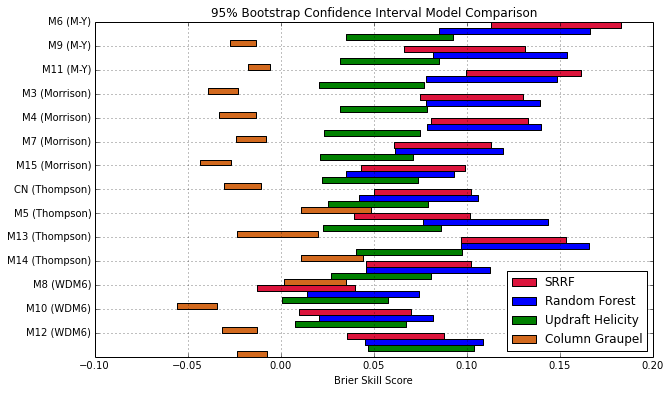

In [67]:
models = ['cqgmax_max','uh_max_max','rf','srrf']
longNames = ['Column Graupel','Updraft Helicity','Random Forest','SRRF']
colors = ['chocolate','green','blue','crimson']
microphysics = np.array(['Thompson','Morrison','Morrison',
                'Thompson','M-Y','Morrison','WDM6',
                'M-Y','WDM6','M-Y','WDM6','Thompson',
                'Thompson','Morrison'])
mp_sort = np.argsort(microphysics)[::-1]
shortMember = np.array([x[6:9].strip("_").upper() + " (%s)" % microphysics[i] for i,x in enumerate(bss_comp['member'])],dtype=str)
figure(figsize=(10,6))
allBars = []
for i,model in enumerate(models):
    intervals = np.array(bss_comp[model])
    bottoms = np.arange(i,intervals.shape[0] * len(models),len(models))
    bars = barh(bottoms,intervals[mp_sort,1] - intervals[mp_sort,0],1,left=intervals[mp_sort,0],color=colors[i])
    allBars.append(bars)
ylim(0,len(models) * len(out['member']))
yticks(np.arange(len(models),len(out['member'])*len(models) + len(models),len(models)),shortMember[mp_sort])
grid()
xlabel("Brier Skill Score")
title("95% Bootstrap Confidence Interval Model Comparison")
legend(allBars[::-1],longNames[::-1],loc=0)
savefig("bss_model_comparison.pdf")


In [107]:
varGrid = SSEFModelGrid("/caps2/djgagne/spring2013/","wrf-s4cn_arw","20130520",2,2,"wupmax")
varGrid.close()
bufferGrid = SSEFModelGrid("/caps2/djgagne/spring2013/","wrf-s4cn_arw","20130520",2,2,"r10cmx")
bufferGrid.close()
cqgGrid = SSEFModelGrid("/caps2/djgagne/spring2013/","wrf-s4m3_arw","20130520",2,2,"cqgmax")
cqgGrid.close()

In [4]:
startDate = datetime(2013,5,20,2,0)
endDate = datetime(2013,5,20,2,0)
mesh4km = MESHInterpolatedGrid(startDate,endDate)

In [5]:
bmap = Basemap(projection='lcc',
               resolution='i',
               lon_0=-95,
               lat_0=38,
               llcrnrlon=-100,
               llcrnrlat=35,
               urcrnrlon=-90,
               urcrnrlat=44)


In [7]:
ew = EnhancedWatershed(5,2,40,20,10)
bufferThreshold=35
updrafts = ew.label(varGrid.data[0])
updrafts = ew.sizeFilter(updrafts,20)
storms = watershed(bufferGrid.data[0].max() + 1 - bufferGrid.data[0],updrafts,
                   mask=((bufferGrid.data[0]>=bufferThreshold) | (updrafts>0)))


In [110]:
ewc = EnhancedWatershed(10,2,64,146,29)
graupelObjs = ewc.label(gaussian_filter(cqgGrid.data[0],1))
graupelSize10 = ewc.sizeFilter(graupelObjs,5)
graupelSize20 = ewc.sizeFilter(graupelObjs,10)


In [75]:
ewr = EnhancedWatershed(7,2,70,100,10)
upObjs = ewc.label(gaussian_filter(varGrid.data[0],1))
upObjsSize5 = ewc.sizeFilter(upObjs,5)

In [6]:
x,y = bmap(varGrid.lon,varGrid.lat)


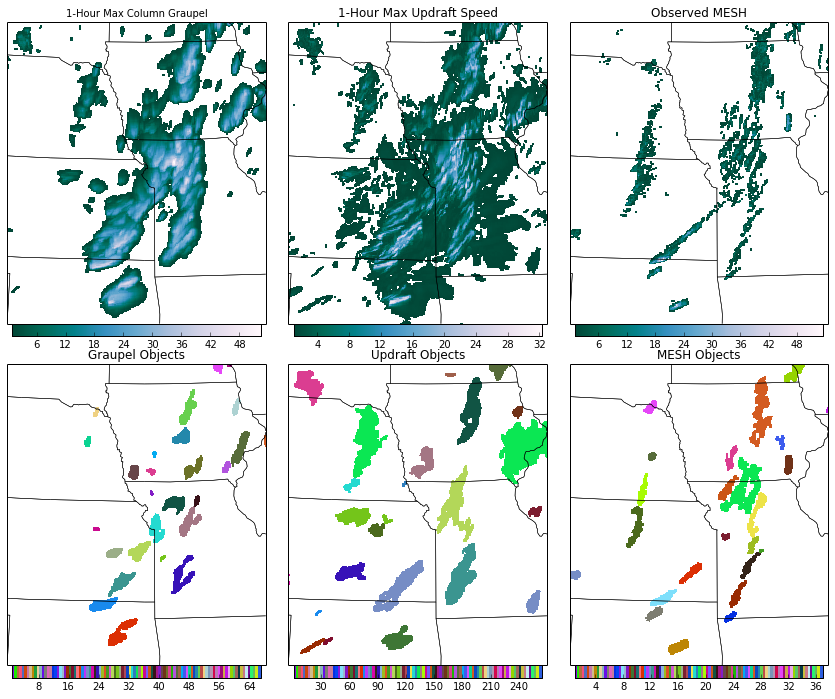

In [111]:
cmap = ListedColormap(np.random.rand(100,3))
figure(figsize=(12,10))
subplots_adjust(0.01,0.01,0.98,0.95,wspace=0.02,hspace=0.02)
fontsize=10
subplot(2,3,1)
bmap.drawstates()
pcolormesh(x,y,np.ma.array(cqgGrid.data[0],mask=cqgGrid.data[0]<1),vmin=1,cmap=get_cmap("PuBuGn_r"))
title("1-Hour Max Column Graupel",size=fontsize)
colorbar(orientation='horizontal',shrink=0.9,fraction=0.1,pad=0)

subplot(2,3,2)
bmap.drawstates()
pcolormesh(x,y,np.ma.array(varGrid.data[0],mask=varGrid.data[0]<1),vmin=1,cmap=get_cmap("PuBuGn_r"))
title("1-Hour Max Updraft Speed")
colorbar(orientation='horizontal',shrink=0.9,fraction=0.1,pad=0)

subplot(2,3,3)
bmap.drawstates()
pcolormesh(x,y,np.ma.array(mesh4km.MESH[0],mask=mesh4km.MESH[0]<1),vmin=1,cmap=get_cmap("PuBuGn_r"))
title("Observed MESH")
colorbar(orientation='horizontal',shrink=0.9,fraction=0.1,pad=0)

subplot(2,3,4)
bmap.drawstates()
pcolormesh(x,y,np.ma.array(graupelSize10,mask=graupelSize10<1),vmin=1,cmap=cmap)
title("Graupel Objects")
colorbar(orientation='horizontal',shrink=0.9,fraction=0.1,pad=0)

subplot(2,3,5)
bmap.drawstates()
pcolormesh(x,y,np.ma.array(upObjsSize5,mask=upObjsSize5<1),vmin=1,cmap=cmap)
colorbar(orientation='horizontal',shrink=0.9,fraction=0.1,pad=0)
title("Updraft Objects")

subplot(2,3,6)
bmap.drawstates()
pcolormesh(x,y,np.ma.array(meshLabel4,mask=meshLabel4<1),vmin=1,cmap=cmap)
colorbar(orientation='horizontal',shrink=0.9,fraction=0.1,pad=0)
title("MESH Objects")

savefig("watershed_comparison.png",dpi=200)


In [71]:
ew1 = EnhancedWatershed(5,5,70,50,10)
meshLabel1 = ew1.label(mesh4km.MESH[0])
ew2 = EnhancedWatershed(1,5,70,50,10)
meshLabel2 = ew2.label(gaussian_filter(mesh4km.MESH[0],1))
ew3 = EnhancedWatershed(1,4,100,500,30)
meshLabel3 = ew3.label(gaussian_filter(mesh4km.MESH[0],1))
ew4 = EnhancedWatershed(1,2,70,100,100)
meshLabel4 = ew4.label(gaussian_filter(mesh4km.MESH[0],1))
meshLabel4 = ew4.sizeFilter(meshLabel4,5)

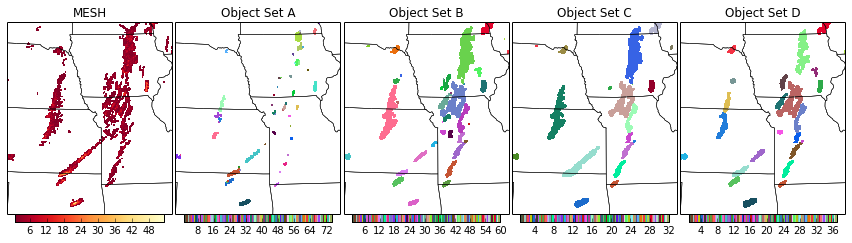

In [72]:
#ewm = EnhancedWatershed(1,4,100,500,30)
#meshLabel = ewm.label(gaussian_filter(mesh4km.MESH[0],1))
#meshLabel = ewm.sizeFilter(meshLabel,1)
figure(figsize=(12,5))
subplots_adjust(0.01,0.01,0.98,0.95,wspace=0.02,hspace=0.02)
subplot(1,5,1)
bmap.drawstates()
pcolormesh(x,y,np.ma.array(mesh4km.MESH[0],mask=mesh4km.MESH[0]<1),cmap="YlOrRd_r",vmin=1)
colorbar(orientation='horizontal',shrink=0.9,fraction=0.05,pad=0)
title("MESH")

subplot(1,5,2)
bmap.drawstates()
pcolormesh(x,y,np.ma.array(meshLabel1,mask=meshLabel1<1),cmap=cmap)
colorbar(orientation='horizontal',shrink=0.9,fraction=0.05,pad=0)
title("Object Set A")

subplot(1,5,3)
bmap.drawstates()
pcolormesh(x,y,np.ma.array(meshLabel2,mask=meshLabel2<1),cmap=cmap)
colorbar(orientation='horizontal',shrink=0.9,fraction=0.05,pad=0)
title("Object Set B")

subplot(1,5,4)
bmap.drawstates()
pcolormesh(x,y,np.ma.array(meshLabel3,mask=meshLabel3<1),cmap=cmap)
colorbar(orientation='horizontal',shrink=0.9,fraction=0.05,pad=0)
title("Object Set C")

subplot(1,5,5)
bmap.drawstates()
pcolormesh(x,y,np.ma.array(meshLabel4,mask=meshLabel4<1),cmap=cmap)
colorbar(orientation='horizontal',shrink=0.9,fraction=0.05,pad=0)
title("Object Set D")
savefig("mesh_example_cmaps.png",dpi=300)

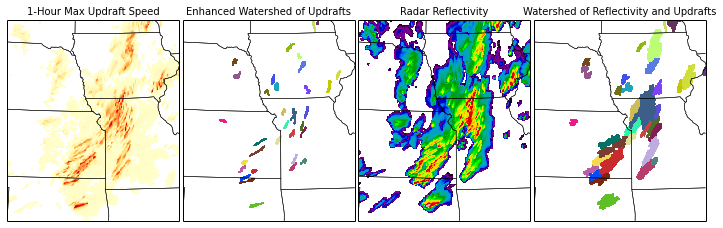

In [9]:
cmap = ListedColormap (np.random.rand(updrafts.max(),3))
figure(figsize=(10,3.2))
subplots_adjust(0.01,0.01,0.98,0.95,wspace=0.02,hspace=0.02)
fontsize=10
subplot(1,4,1)
bmap.drawstates()
pcolormesh(x,y,np.ma.array(varGrid.data[0],mask=varGrid.data[0]<1),vmin=1,cmap=get_cmap("YlOrRd"))
title("1-Hour Max Updraft Speed",size=fontsize)
subplot(1,4,2)
bmap.drawstates()
pcolormesh(x,y,np.ma.array(updrafts,mask=updrafts==0),vmin=1,cmap=cmap)
title("Enhanced Watershed of Updrafts",size=fontsize)
subplot(1,4,3)
bmap.drawstates()
pcolormesh(x,y,np.ma.array(bufferGrid.data[0],mask=bufferGrid.data[0]<=0),vmin=-1,cmap=get_cmap("spectral"))
title("Radar Reflectivity",size=fontsize)
subplot(1,4,4)
bmap.drawstates()
pcolormesh(x,y,np.ma.array(storms,mask=storms==0),vmin=1,cmap=cmap)
title("Watershed of Reflectivity and Updrafts",size=fontsize)
savefig("watershed_schematic.png",dpi=300)

In [39]:
data = pd.read_csv("/sharp/djgagne/rf_storm_results/wrf-s4cn_arw/rf_wrf-s4cn_arw_trees_100_run_20130425.csv")


In [43]:
date = []
hour = []
storm = []
for s in data["graph id"].tolist():
    splitID = s.split("_")
    date.append(int(splitID[2]))
    hour.append(int(splitID[3]))
    storm.append(int(splitID[4]))
data['date'] = date
data['hour'] = hour
data['storm'] = storm

In [25]:
d = Dataset("/sharp/djgagne/storm_labels/wrf-s4cn_arw_20130520_labels.nc")

In [14]:
data['date']

NameError: name 'data' is not defined

In [54]:
data['severe'][(data['date']==20130502) & (data['hour']==2) & (data['storm']==3)].values

0.20999999999999999

In [40]:
caseMember = 'wrf-s4m9_arw'
hailCase = HailMemberCaseStudy(20130520,caseMember)


In [4]:
hd = HailData(datetime(2013,5,20,0),datetime(2013,5,20,7))
hd.loadData("../mping.csv","mping")
hd.loadWebData(hd.startDate,hd.endDate)


2013-05-19 12:00:00


In [27]:
hour = 2

hdc = hd.filterReportsByDate(hd.startDate + timedelta(seconds=(hour-1)* 3600),
                             hd.startDate + timedelta(seconds=(hour+1) * 3600))
allLabelGrids = {}
for caseMember in hcv.ensembleMembers:
    shortMember = caseMember.split('_')[0].split('-')[1][2:].upper()
    hailCase = HailMemberCaseStudy(20130520,caseMember)
    hx,hy = bmap(hdc.data['longitude'],hdc.data['latitude'])
    sev = np.where(hdc.data['size']>=1.0)[0]
    non = np.where(hdc.data['size']<1.0)[0]
    labelGrids = hailCase.labelHour(hour)
    allLabelGrids[shortMember] = labelGrids
    fig= figure(figsize=(10,6))
    subplots_adjust(0.02,0.09,0.98,0.95,wspace=0.05)
    subplot(1,2,1)
    bmap.drawstates()
    pcolormesh(x,y,np.ma.array(labelGrids['srrf'],mask=labelGrids['srrf']<=0),
               vmin=0.,
               vmax=1,
               cmap=get_cmap("YlOrRd",10))
    title("Spatiotemporal Relational Random Forest May 20 %02d UTC" % (hour))
    annotate(shortMember,(0.1,0.8),xycoords='axes fraction',size=22,bbox=dict(facecolor='0.9',alpha=1))
    sev_scat = scatter(hx[sev],hy[sev],marker='o',color='r')
    non_scat = scatter(hx[non],hy[non],marker='o',color='b')
    legend((sev_scat,non_scat),("Severe","Nonsevere"),loc=4)
    subplot(1,2,2)
    bmap.drawstates()
    out = pcolormesh(x,y,np.ma.array(labelGrids['rf'],mask=labelGrids['rf']<0.01),
               vmin=0,
               vmax=1,
               cmap=get_cmap("YlOrRd",10))
    sev_scat = scatter(hx[sev],hy[sev],marker='o',color='r')
    non_scat = scatter(hx[non],hy[non],marker='o',color='b')
    legend((sev_scat,non_scat),("Severe","Nonsevere"),loc=4)
    title("Random Forest May 20 %02d UTC" % (hour))
    annotate(shortMember,(0.1,0.8),xycoords='axes fraction',size=22,bbox=dict(facecolor='0.9',alpha=1))

    cax = fig.add_axes([0.1,0.03,0.8,0.05])
    colorbar(out,cax,orientation='horizontal')
    savefig("case_study_20130520_%02d_%s.png" % (hour,caseMember))
    close()

In [28]:
srrfGrids = np.zeros((len(allLabelGrids.keys()),allLabelGrids['CN']['srrf'].shape[0],allLabelGrids['CN']['srrf'].shape[1]))
rfGrids = np.zeros((len(allLabelGrids.keys()),allLabelGrids['CN']['srrf'].shape[0],allLabelGrids['CN']['srrf'].shape[1]))

i = 0
for member,labelGrid in allLabelGrids.iteritems():
    print member
    srrfGrids[i] = labelGrid['srrf']
    rfGrids[i] = labelGrid['rf']
    i+= 1
srrfMean = srrfGrids.mean(axis=0)
rfMean = rfGrids.mean(axis=0)
srrfMedian = np.median(srrfGrids,axis=0)
rfMedian = np.median(rfGrids,axis=0)


M11
CN
M10
M13
M5
M4
M7
M6
M15
M14
M3
M12
M9
M8


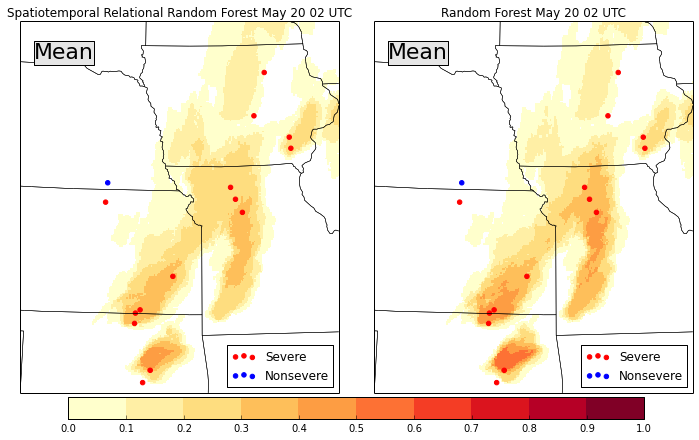

In [20]:
srrfAg = srrfMean
rfAg = rfMean
agType = "Mean"
fig= figure(figsize=(10,6))
subplots_adjust(0.02,0.09,0.98,0.95,wspace=0.05)
subplot(1,2,1)
bmap.drawstates()
pcolormesh(x,y,np.ma.array(srrfAg,mask=srrfAg<=0),
           vmin=0.,
           vmax=1,
           cmap=get_cmap("YlOrRd",10))
title("Spatiotemporal Relational Random Forest May 20 %02d UTC" % (hour))
annotate(agType,(0.05,0.9),xycoords='axes fraction',size=22,bbox=dict(facecolor='0.9',alpha=1))
sev_scat = scatter(hx[sev],hy[sev],marker='o',color='r')
non_scat = scatter(hx[non],hy[non],marker='o',color='b')
legend((sev_scat,non_scat),("Severe","Nonsevere"),loc=4)
subplot(1,2,2)
bmap.drawstates()
out = pcolormesh(x,y,np.ma.array(rfAg,mask=rfAg<0.01),
           vmin=0,
           vmax=1,
           cmap=get_cmap("YlOrRd",10))
sev_scat = scatter(hx[sev],hy[sev],marker='o',color='r')
non_scat = scatter(hx[non],hy[non],marker='o',color='b')
legend((sev_scat,non_scat),("Severe","Nonsevere"),loc=4)
title("Random Forest May 20 %02d UTC" % (hour))
annotate(agType,(0.05,0.9),xycoords='axes fraction',size=22,bbox=dict(facecolor='0.9',alpha=1))

cax = fig.add_axes([0.1,0.03,0.8,0.05])
colorbar(out,cax,orientation='horizontal')
savefig("case_study_20130520_02_%s.png" % (agType.lower()))

In [45]:
for member in hcv.ensembleMembers:
    print member
    imp_files = glob("/sharp/djgagne/rf_storm_results/" + member + "/*importances.csv")
    imp = pd.read_csv(imp_files[0])
    for i,imp_file in enumerate(imp_files[1:]):
        new_imp = pd.read_csv(imp_files[1])
        imp[i] = new_imp['importance']
    imp['mean'] = imp.loc[:,1:3].mean(axis=1)
    sorted_imp = imp.sort_index(by='mean')
    print sorted_imp[-1:-20:-1],
        

wrf-s4cn_arw
       variable  importance         0         1         2         3      mean
1          Hour    0.021955  0.031719  0.031719  0.031719  0.031719  0.031719
68   uh_max_max    0.031155  0.030337  0.030337  0.030337  0.030337  0.030337
73   wdnmax_min    0.023193  0.028203  0.028203  0.028203  0.028203  0.028203
66  tmp850_mean    0.018583  0.024572  0.024572  0.024572  0.024572  0.024572
20   lg3max_max    0.023351  0.022675  0.022675  0.022675  0.022675  0.022675
26   llqg05_max    0.024007  0.021675  0.021675  0.021675  0.021675  0.021675
54   shr06_mean    0.019379  0.020544  0.020544  0.020544  0.020544  0.020544
21  lg3max_mean    0.015445  0.019744  0.019744  0.019744  0.019744  0.019744
47   r10cmx_max    0.023077  0.019143  0.019143  0.019143  0.019143  0.019143
53    shr06_max    0.023158  0.019063  0.019063  0.019063  0.019063  0.019063
51   sblcl_mean    0.017166  0.018802  0.018802  0.018802  0.018802  0.018802
69  uh_max_mean    0.020422  0.018056  0.018056  0.

In [5]:
startDate = datetime(2013,5,20,1,0)
endDate = datetime(2013,5,20,3,0)
mesh = MESHNativeGrid(startDate,endDate)

20130520-005934.netcdf.gz
20130520-015937.netcdf.gz
20130520-025936.netcdf.gz


2.15748


<matplotlib.colorbar.Colorbar instance at 0x40da7878>

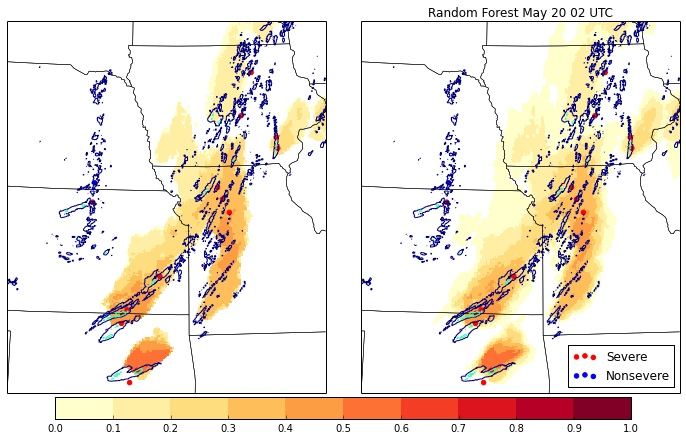

In [40]:
meshFilter = np.where(mesh.MESH <= 0,0,mesh.MESH)
meshAcc = meshFilter.max(axis=0)/25.4
print meshAcc.max()
fig = figure(figsize=(10,6))
subplots_adjust(0.02,0.09,0.98,0.95,wspace=0.05)
subplot(1,2,1)
mx,my = bmap(mesh.lon,mesh.lat)
bmap.drawstates()
out = pcolormesh(x,y,np.ma.array(rfMedian,mask=rfMedian<0.01),vmin=0,vmax=1,cmap=get_cmap("YlOrRd",10))
contour(mx,my,meshAcc,[0.25,1,2])
sev_scat = scatter(hx[sev],hy[sev],marker='o',color='r')
non_scat = scatter(hx[non],hy[non],marker='o',color='b')
subplot(1,2,2)
bmap.drawstates()
out = pcolormesh(x,y,np.ma.array(rfMean,mask=rfMean<0.01),
           vmin=0,
           vmax=1,
           cmap=get_cmap("YlOrRd",10))
contour(mx,my,meshAcc,[0.25,1,2])
sev_scat = scatter(hx[sev],hy[sev],marker='o',color='r')
non_scat = scatter(hx[non],hy[non],marker='o',color='b')
legend((sev_scat,non_scat),("Severe","Nonsevere"),loc=4)
title("Random Forest May 20 %02d UTC" % (hour))
cax = fig.add_axes([0.1,0.03,0.8,0.05])
colorbar(out,cax,orientation='horizontal')

In [31]:
maxMESH = mesh.MESH.max(axis=0)
maxMESH[maxMESH<0] = 0

In [67]:
from scipy.interpolate import RectBivariateSpline,interp2d

In [83]:
f = RectBivariateSpline(mesh.lat[::-1,0],mesh.lon[0],maxMESH[::-1])

In [18]:
maxMESH.shape,mesh.lon[0].shape,mesh.lat[::-1,0].shape

((3000, 6200), (6200,), (3000,))

In [23]:
subHailData =  hd.filterReportsByDate(startDate,endDate)

In [84]:
reportMESH = f.ev(subHailData.data['latitude'],subHailData.data['longitude'])

(0, 4)

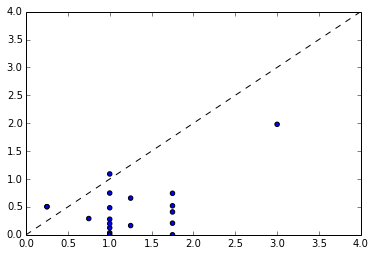

In [98]:
scatter(subHailData.data['size'],reportMESH /25.4)
plot(np.arange(0,5,0.1),np.arange(0,5,0.1),'k--')
xlim(0,4)
ylim(0,4)

In [94]:
meshField = f.ev(varGrid.lat.ravel(),varGrid.lon.ravel())

In [88]:
meshInterpGrid = meshField.reshape(varGrid.lon.shape)

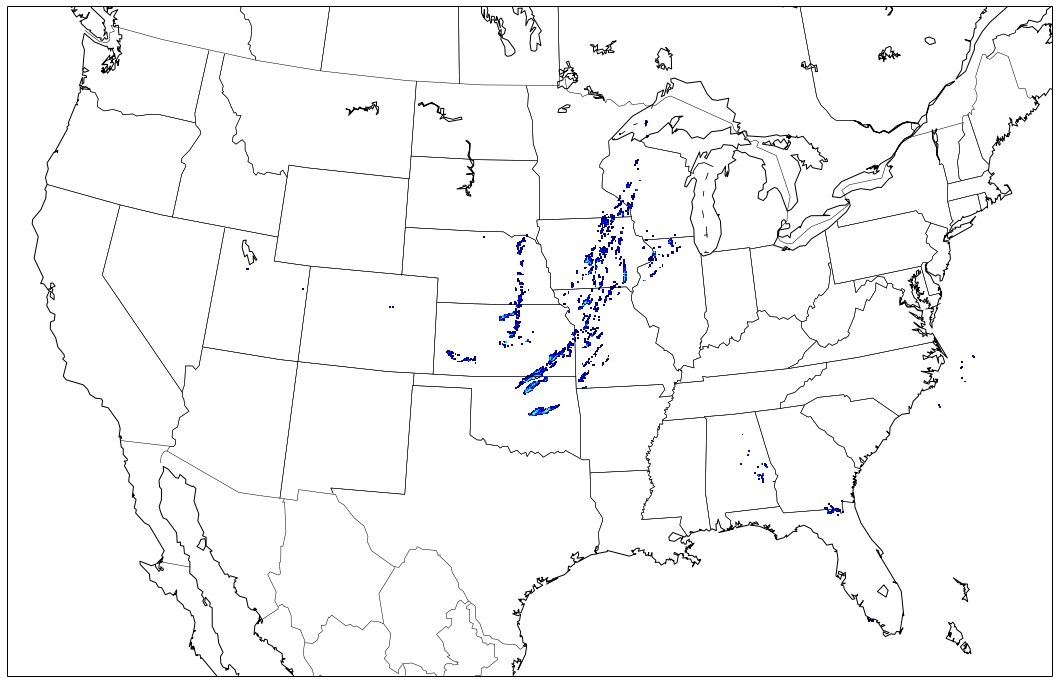

In [97]:
figure(figsize=(20,12))
varGrid.basemap.drawstates()
varGrid.basemap.drawcoastlines()
varGrid.basemap.drawcountries()
meshInterpGridIn = meshInterpGrid/25.4
pcolormesh(varGrid.x,varGrid.y,np.ma.array(meshInterpGridIn,mask=meshInterpGridIn<0.25),vmin=0.25,vmax=2)
mx,my = varGrid.basemap(mesh.lon,mesh.lat)
#pcolormesh(mx,my,np.ma.array(maxMESH,mask=maxMESH<=0))

In [116]:
testDate = datetime(2013,5,21,0,1)
testDate + timedelta(minutes=60 - testDate.minute)

datetime.datetime(2013, 5, 21, 1, 0)

In [8]:
import data.MESHGrid

In [14]:
startDate = datetime(2013,5,18,12,0)
endDate = datetime(2013,5,21,12,0)
mesh_19_20 = MESHNativeGrid(startDate,endDate)
mping_19_20 = HailData(startDate,endDate)

20130518-115932.netcdf.gz
20130518-125934.netcdf.gz
20130518-135933.netcdf.gz
20130518-145936.netcdf.gz
20130518-155928.netcdf.gz
20130518-165937.netcdf.gz
20130518-175931.netcdf.gz
20130518-185930.netcdf.gz
20130518-195934.netcdf.gz
20130518-205939.netcdf.gz
20130518-215937.netcdf.gz
20130518-225935.netcdf.gz
20130518-235932.netcdf.gz
20130519-005937.netcdf.gz
20130519-015924.netcdf.gz
20130519-025933.netcdf.gz
20130519-035932.netcdf.gz
20130519-045931.netcdf.gz
20130519-055928.netcdf.gz
20130519-065939.netcdf.gz
20130519-075928.netcdf.gz
20130519-085936.netcdf.gz
20130519-095927.netcdf.gz
20130519-105932.netcdf.gz
20130519-115919.netcdf.gz
20130519-125936.netcdf.gz
20130519-135939.netcdf.gz
20130519-145938.netcdf.gz
20130519-155930.netcdf.gz
20130519-165932.netcdf.gz
20130519-175928.netcdf.gz
20130519-185932.netcdf.gz
20130519-195935.netcdf.gz
20130519-205934.netcdf.gz
20130519-215932.netcdf.gz
20130519-225933.netcdf.gz
20130519-235938.netcdf.gz
20130520-005934.netcdf.gz
20130520-015

In [15]:
mping_19_20.loadData("../mping.csv",fmt='mping')
mping_19_20.filterReportsByDate(startDate,endDate,newObject=False)


In [16]:
mesh_19_20.MESH[mesh_19_20.MESH<=0] = 0
mpingMeshSizes = mesh_19_20.interpolateReports(mping_19_20)

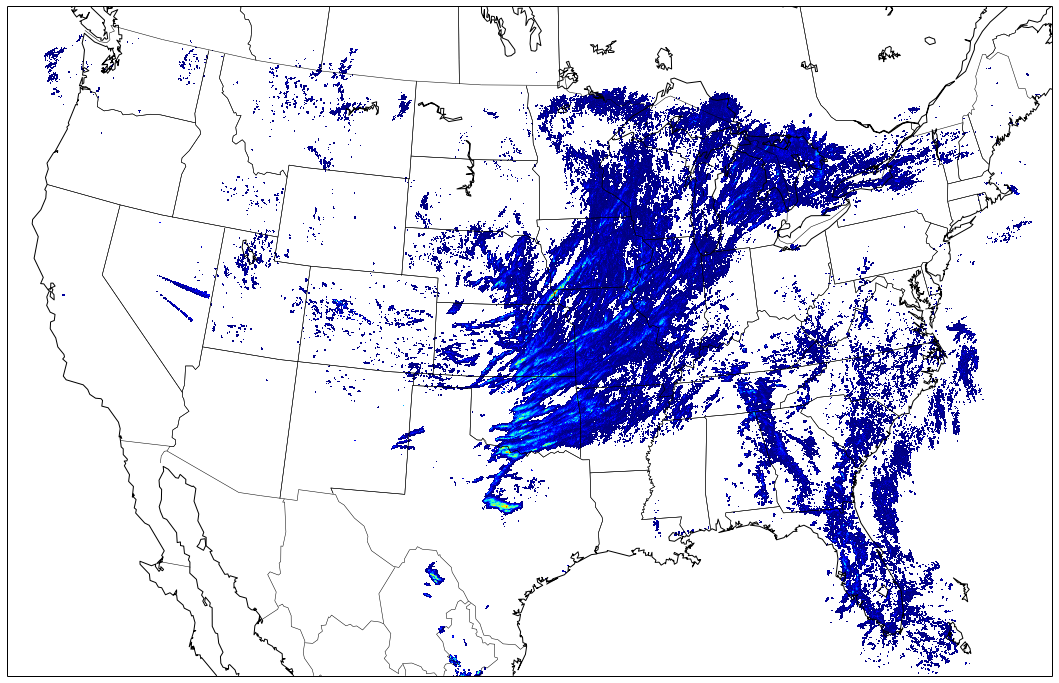

In [16]:
maxMESH = mesh_19_20.MESH.max(axis=0)
figure(figsize=(20,12))
varGrid.basemap.drawstates()
varGrid.basemap.drawcoastlines()
varGrid.basemap.drawcountries()
#meshInterpGridIn = meshInterpGrid/25.4
#pcolormesh(varGrid.x,varGrid.y,np.ma.array(meshInterpGridIn,mask=meshInterpGridIn<0.25),vmin=0.25,vmax=2)
mx,my = varGrid.basemap(mesh_19_20.lon,mesh_19_20.lat)
pcolormesh(mx,my,np.ma.array(maxMESH,mask=maxMESH<=0))

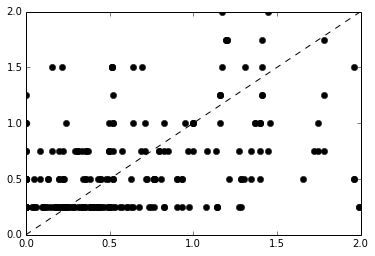

In [24]:
plot(mpingMeshSizes / 25.4,mping_19_20.data['size'],'ko')
xlim(0,2)
ylim(0,2)
plot(np.arange(0,2.1,0.1),np.arange(0,2.1,0.1),'k--')

In [28]:
np.corrcoef(mpingMeshSizes / 25.4, mping_19_20.data['size'])

array([[ 1.        ,  0.46544174],
       [ 0.46544174,  1.        ]])

In [67]:
wupmaxScores = pd.read_csv("/sharp/djgagne/ewEvaluation/20130519_wupmax_ewEval.csv")
r10cmxScores = pd.read_csv("/sharp/djgagne/ewEvaluation/20130519_r10cmx_ewEval.csv")
cqgmaxScores = pd.read_csv("/sharp/djgagne/ewEvaluation/20130519_cqgmax_ewEval.csv")

In [72]:
cqgmaxScores[cqgmaxScores["Member"]=="m12"].sort(columns="ETS",ascending=False)

,Member,Hour,Min,Step,Max,Size,Depth,Timing,Hits,FalseAlarms,Misses,TrueNegatives,POD,POFD,FAR,CSI,ETS,PSS,HSS,Bias
12218,m12,23,10,5,50,500,10,4.77,393,4908,1194,921018,0.2476,0.0053,0.9259,0.0605,0.0592,0.2423,0.1118,3.3403
12209,m12,23,10,2,40,500,10,5.06,414,5340,1173,920586,0.2609,0.0058,0.9281,0.0598,0.0584,0.2551,0.1104,3.6257
12212,m12,23,10,5,40,500,10,3.98,414,5359,1173,920567,0.2609,0.0058,0.9283,0.0596,0.0583,0.2551,0.1101,3.6377
12232,m12,23,10,5,60,500,10,5.28,396,5168,1191,920758,0.2495,0.0056,0.9288,0.0586,0.0573,0.2439,0.1084,3.5060
12229,m12,23,10,2,60,500,10,5.93,397,5224,1190,920702,0.2502,0.0056,0.9294,0.0583,0.0570,0.2445,0.1078,3.5419
12217,m12,23,10,2,50,500,10,5.44,397,5215,1190,920711,0.2502,0.0056,0.9293,0.0584,0.0570,0.2445,0.1079,3.5362
12122,m12,22,10,5,40,500,10,3.85,322,4812,1178,921201,0.2147,0.0052,0.9373,0.0510,0.0498,0.2095,0.0948,3.4227
12226,m12,23,10,5,50,50,10,8.86,236,3090,1351,922836,0.1487,0.0033,0.9290,0.0505,0.0493,0.1454,0.0940,2.0958
12134,m12,22,10,5,50,500,10,5.15,322,4874,1178,921139,0.2147,0.0053,0.9380,0.0505,0.0493,0.2094,0.0939,3.4640
12141,m12,22,10,5,60,500,10,4.51,322,4941,1178,921072,0.2147,0.0053,0.9388,0.0500,0.0487,0.2093,0.0929,3.5087


['cn' 'm10' 'm11' 'm12' 'm13' 'm14' 'm15' 'm3' 'm4' 'm5' 'm6' 'm7' 'm8'
 'm9']


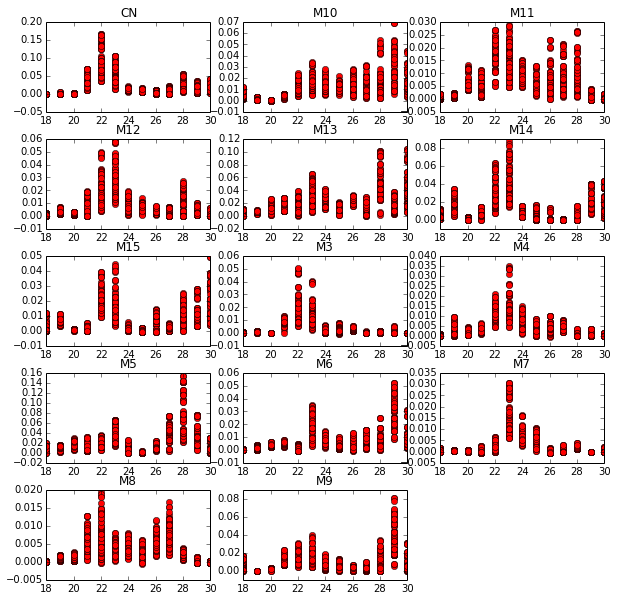

In [73]:
scores = cqgmaxScores
members = np.unique(scores["Member"])
print members
score = "ETS"

figure(figsize=(10,10))
subplots_adjust(hspace=0.3)
for m,member in enumerate(members):
    subplot(5,3,m+1)
    plot(scores[scores["Member"]==member]["Hour"], 
     scores[scores["Member"]==member][score],'ro')
    title(member.upper())
savefig("/sharp/djgagne/spatial_eval_wupmax_" + score + ".pdf")

['cn' 'm10' 'm11' 'm12' 'm13' 'm14' 'm15' 'm3' 'm4' 'm5' 'm6' 'm7' 'm8'
 'm9']


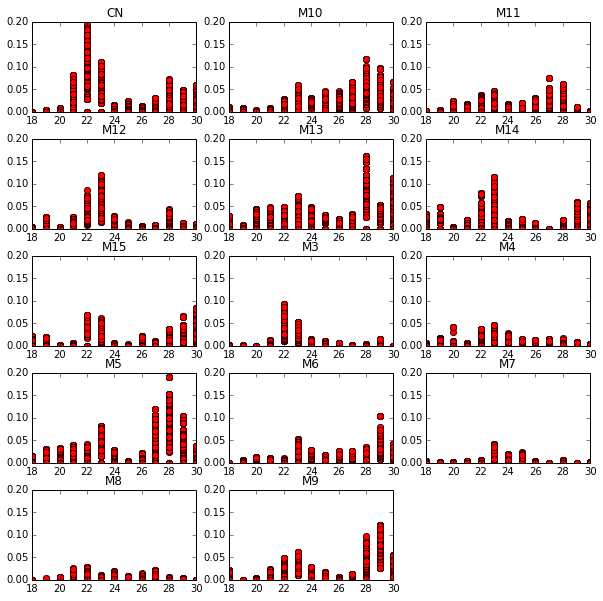

In [104]:
members = np.unique(cqgmaxScores["Member"])
score = "ETS"
print members
figure(figsize=(10,10))
subplots_adjust(hspace=0.3)
for m,member in enumerate(members):
    subplot(5,3,m+1)
    plot(cqgmaxScores[cqgmaxScores["Member"]==member]["Hour"],
     cqgmaxScores[cqgmaxScores["Member"]==member][score],'ro')
    ylim(0,0.2)
    title(member.upper())
savefig("/sharp/djgagne/spatial_eval_cqgmax_" + score + ".pdf")

In [2]:
mod = SSEFModelGrid("/caps2/djgagne/spring2013/","wrf-s4cn_arw","20130519",18,30,"cqgmax")

meshTime = MESHInterpolatedGrid(datetime(2013,5,19,18,0),datetime(2013,5,20,6,0))

20130519-00:00 20130520-00:00


In [3]:
modr10 = SSEFModelGrid("/caps2/djgagne/spring2013/","wrf-s4cn_arw","20130519",22,22,"r10cmx")

In [14]:
rcol = matplotlib.colors.ListedColormap(np.random.random((100,3)))

In [118]:
ew = EnhancedWatershed(15,5,50,50,10)
ewObs = EnhancedWatershed(5,5,70,50,10)
gaf = gauss2D(shape=(5,5),sigma=1.0)
modLabels = ew.label(ndi.convolve(mod.data[4],gaf))
modLabels = ew.sizeFilter(modLabels,5)
obsLabels = ewObs.label(ndi.convolve(meshTime.MESH[4],gaf))
obsLabels = ewObs.sizeFilter(obsLabels,9)
#obsMarked = ewObs.findLocalMaxima(ndi.convolve(meshTime.MESH[4],gaf))
#obsMarked[obsMarked>=0] = 1

In [4]:
def gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h



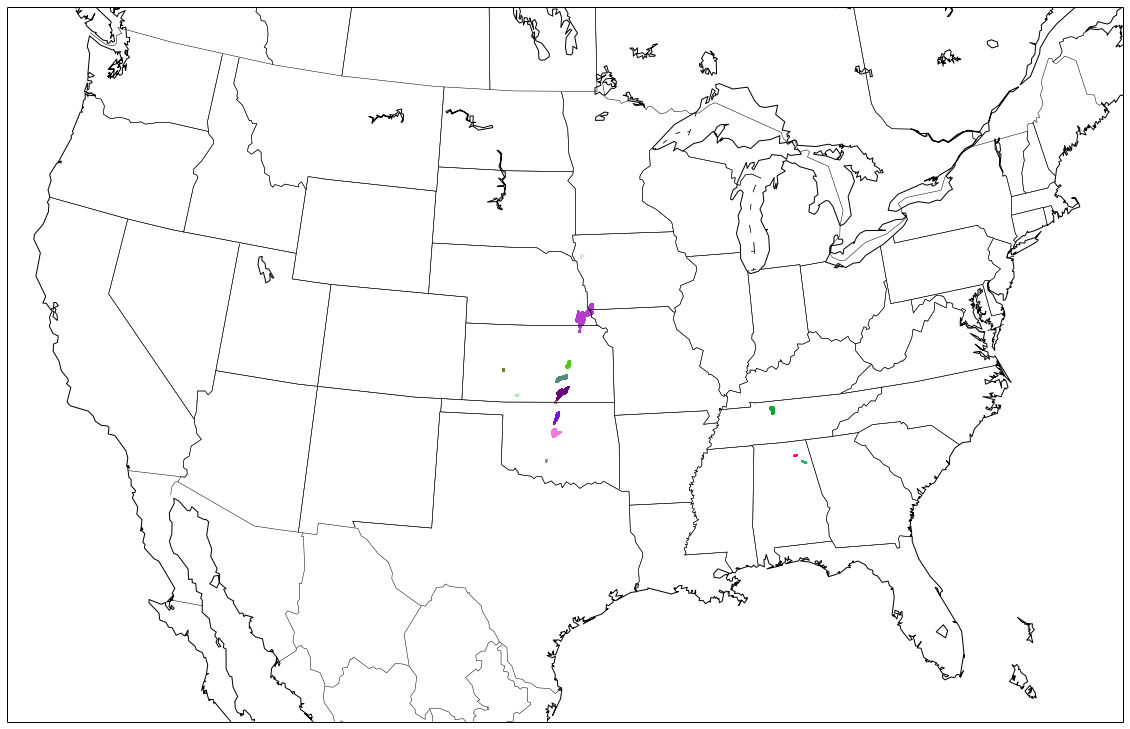

In [120]:
figure(figsize=(20,20))
mod.basemap.drawstates()
mod.basemap.drawcoastlines()
mod.basemap.drawcountries()
pcolormesh(mod.x,mod.y,np.ma.array(modLabels,mask=modLabels==0),cmap=rcol)
#plot(labelX,labelY,'ko')
#contourf(mod.x,mod.y,meshTime.MESH[4],np.arange(2,60,2),extend='max',cmap='YlOrRd_r',alpha=0.2)
#pcolormesh(mod.x,mod.y,np.ma.array(obsLabels,mask=obsLabels==0),cmap='Reds')
#contourf(mod.x,mod.y,mod.data[0],np.arange(6,50,2),extend='max')
#contour(mod.x,mod.y,mod.data[4],[10],colors='g',extend='max')
#colorbar()


In [36]:
obsSlices  = ndi.find_objects(obsLabels)
obsCentroids = np.array([(0.5 * (x[0].start+x[0].stop),0.5 * (x[1].start+x[1].stop)) for x in obsSlices])
modSlices = ndi.find_objects(modLabels)
modCentroids = np.array([(0.5 * (x[0].start+x[0].stop),0.5 * (x[1].start+x[1].stop)) for x in modSlices])


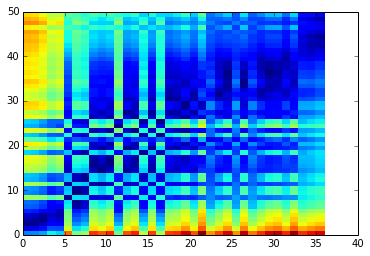

In [56]:
dists = np.zeros((modCentroids.shape[0],obsCentroids.shape[0]))
for f in range(modCentroids.shape[0]):
    for o in range(obsCentroids.shape[0]):
        dists[f,o] = np.sqrt(np.sum((modCentroids[f] - obsCentroids[o])**2))
pcolormesh(dists)

In [65]:
labelX = ndi.labeled_comprehension(mod.x,modLabels,np.arange(1,modLabels.max()),np.mean,float,0)
labelY = ndi.labeled_comprehension(mod.y,modLabels,np.arange(1,modLabels.max()),np.mean,float,0)

In [100]:
hailSize = Dataset("/sharp/djgagne/spring2014/wrf-s4cn_arw/nc_s4cn_arw_2014050100/ar2014050100.nethailsz068400")
updraft = Dataset("/sharp/djgagne/spring2014/wrf-s4cn_arw/nc_s4cn_arw_2014050100/ar2014050100.netwupmax068400")
hs = hailSize.variables['hailsz'][:]
wu = updraft.variables['wupmax'][:]
hailSize.close()
updraft.close()


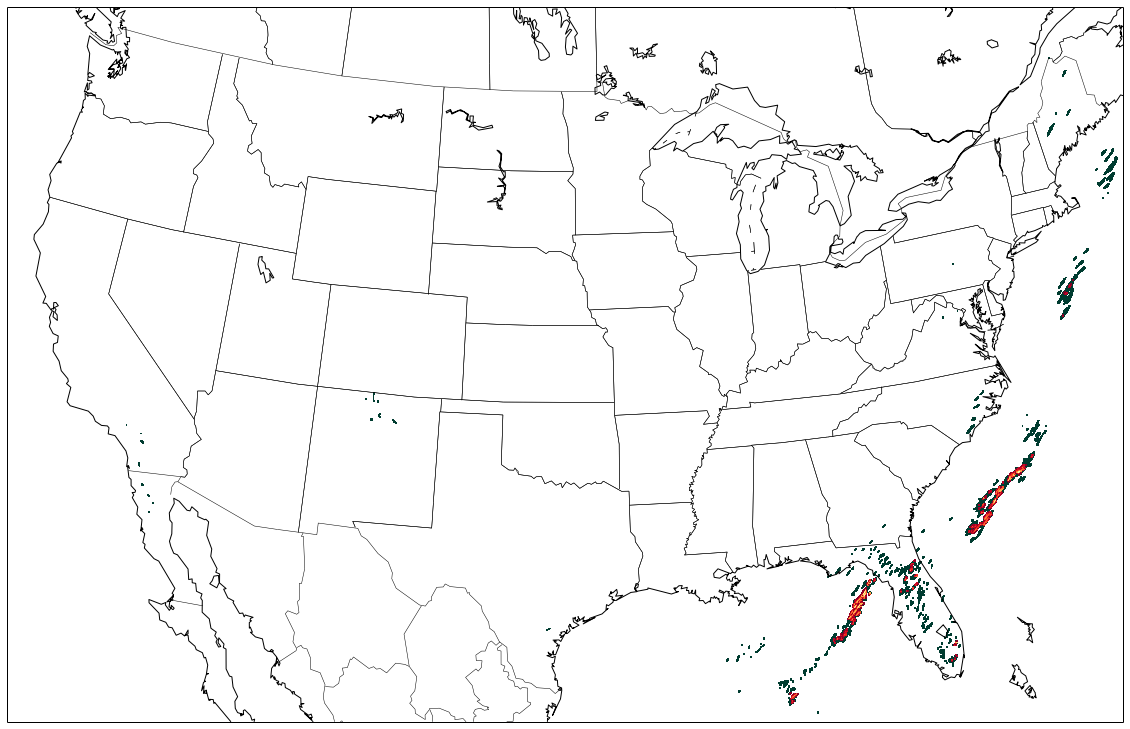

In [104]:
figure(figsize=(20,20))
mod.basemap.drawstates()
mod.basemap.drawcoastlines()
mod.basemap.drawcountries()
pcolormesh(mod.x,mod.y,np.ma.array(hs[0],mask=wu[0]<5),cmap='BrBG_r')
pcolormesh(mod.x,mod.y,np.ma.array(hs[0],mask=hs[0]==0),cmap='YlOrRd_r')


In [117]:
modLabels.max(),obsLabels.max()

(10, 25)

In [52]:
cDate = datetime(2013,4,27,0,0)
eDate = datetime(2013,6,6,0,0)
allMESH = None
while cDate <= eDate:
    cmesh = MESHInterpolatedGrid(cDate,cDate+timedelta(hours=23))
    if allMESH is None:
        allMESH = cmesh.MESH.max(axis=0)
    else:
        allMESH = np.maximum(allMESH,cmesh.MESH.max(axis=0))
    cDate += timedelta(days=1)

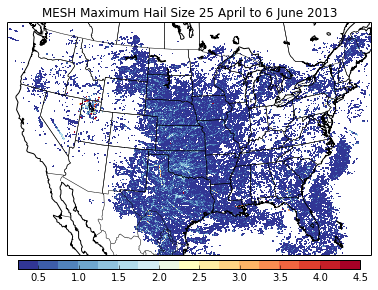

In [55]:
mx,my = varGrid.basemap(cmesh.lon,cmesh.lat)
figure(figsize=(6,4))
subplots_adjust(0,0.05,.99,0.94)
varGrid.basemap.drawstates()
varGrid.basemap.drawcoastlines()
varGrid.basemap.drawcountries()
numColors = len(np.arange(0.25,4.5,0.25))
pcolormesh(mx,my,np.ma.array(allMESH/ 25.4,mask=allMESH<6.35),
           vmin=0.25,vmax=4.5,cmap=get_cmap("RdYlBu_r",numColors))
title("MESH Composite 25 April to 6 June 2013")
cb = colorbar(orientation="horizontal",aspect=40,shrink=0.8,fraction=0.07,pad=0.02)
savefig("mesh_max.png",dpi=300)

(array([ 5329.,  2463.,  1193.,   596.,   332.,   207.,   152.,    85.,
           69.,    62.,    43.,    18.,    26.,    21.]),
 array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,
         3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ]),
 <a list of 14 Patch objects>)

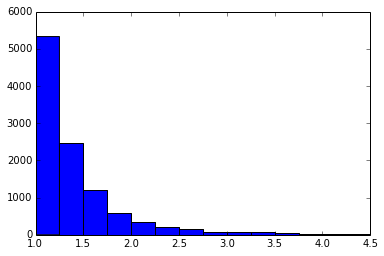

In [60]:
hist(allMESH.ravel()/25.4,np.arange(1,4.75,0.25))